In [28]:
# On importe les librairies dont on aura besoin
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

# séparer les donner de text et les donnée d'entrainement
from sklearn.model_selection import train_test_split 

# rédretion ligéaire
from sklearn.linear_model import LinearRegression
 
# resample
from sklearn.utils import resample
  
from sklearn.metrics import r2_score

from matplotlib.ticker import AutoMinorLocator 

plt.style.use('seaborn-whitegrid')
sns.set()

In [16]:
# Chargement des données
house_data = pd.read_csv('house_data.csv') 

# Résumé des données brutes
house_data.describe()

price     surface  arrondissement
count    827.000000  822.000000      822.000000
mean    2007.342201   58.045925        4.142336
std     1890.894229   44.827522        3.202151
min      390.000000   10.000000        1.000000
25%     1050.000000   28.655000        2.000000
50%     1567.000000   46.100000        3.000000
75%     2346.000000   73.000000        4.000000
max    25000.000000  415.000000       10.000000

In [19]:
# Il y a quelques valeurs manquantes, on supprime ces lignes
house_data = house_data.dropna()

# on rétirer tous les maisons donc le prix est > a 8000 pour éliminer les outlines
data = house_data[house_data["price"] < 8000]


# On reindexe
data = data.reset_index(drop = True)

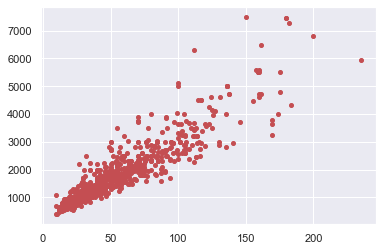

In [32]:
# On affiche les données nettoyées
plt.plot(data['surface'], data['price'], 'ro', markersize=4)
plt.show()

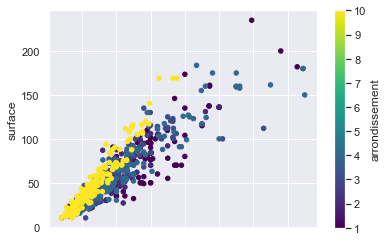

In [25]:
data.plot.scatter("price", "surface", c="arrondissement", colormap='viridis')

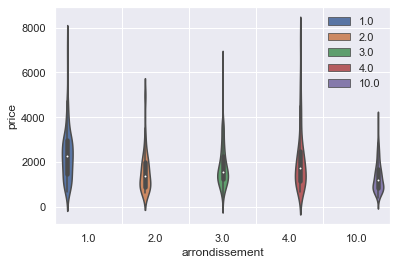

In [27]:
# loyer en fonction des arrondissement
ax1 = sns.violinplot("arrondissement", "price", data=data, hue='arrondissement')
ax1.minorticks_on()
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.legend()
ax1.grid(which='minor', axis='x', linewidth=1)

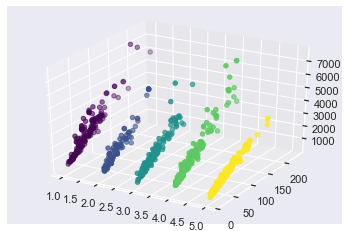

In [29]:
fig = plt.figure().gca(projection='3d')

# Pour faciliter la visualisation, on va changer la valeur de l'arrondissement (10)
tmp_arr = data['arrondissement'][:]
tmp_arr[tmp_arr == 10] = 5

fig.scatter(tmp_arr, data['surface'], data['price'], c=tmp_arr, cmap="viridis")
plt.show()

In [30]:
# trainig set, testing set
xtrain, xtest, ytrain, ytest = train_test_split(data[["surface", "arrondissement"]], data[["price"]], test_size=0.3)

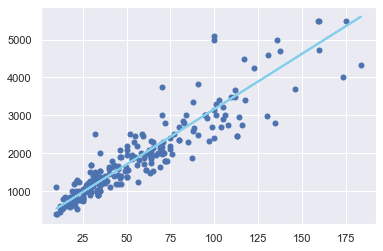

In [31]:
# redressement linéaire
lr = LinearRegression()
lr_baseline = lr.fit(xtrain[["surface"]], ytrain)
baseline_pred = lr_baseline.predict(xtest[["surface"]])

plt.plot(xtest[["surface"]], ytest, 'bo', markersize = 5)
plt.plot(xtest[["surface"]], baseline_pred, color="skyblue", linewidth = 2)

In [36]:
# calcul de R2
def sumsq(x,y):
    return sum((x - y)**2)

def r2score(pred, target):
    return 1 - sumsq(pred, target) / sumsq(target, np.mean(target))

score_bl = r2_score(baseline_pred[:,0], ytest['price'])

print(score_bl)

0.8395896810451701


In [37]:
lrs = []
for i in np.unique(xtrain["arrondissement"]):
    
    # On génère un jeu de données par arrondissement
    tr_arr = xtrain['arrondissement']==i
    te_arr = xtest['arrondissement']==i
    
    xtrain_arr = xtrain[tr_arr]
    ytrain_arr = ytrain[tr_arr]

    xtest_arr = xtest[te_arr]
    ytest_arr = ytest[te_arr]

    lr = LinearRegression()
    lr.fit(xtrain_arr[["surface"]], ytrain_arr)
    lrs.append(lr)

In [38]:
# prédiction finale
final_pred = []

for idx,val in xtest.iterrows():
    final_pred.append(lrs[int(val["arrondissement"]-1)].predict([[val["surface"]]])[0][0])
    
r2score(final_pred, ytest["price"])

0.8677078977647797

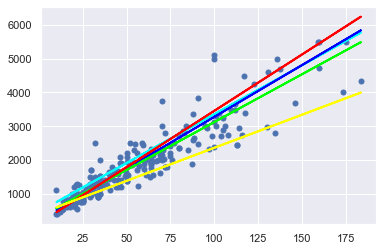

In [39]:
# affichange de la prédiction final
plt.plot(xtest[["surface"]], ytest, 'bo', markersize = 5)
plt.plot(xtest[["surface"]], lrs[0].predict(xtest[["surface"]]), color="#00FFFF", linewidth = 2)
plt.plot(xtest[["surface"]], lrs[1].predict(xtest[["surface"]]), color="#0000FF", linewidth = 2)
plt.plot(xtest[["surface"]], lrs[2].predict(xtest[["surface"]]), color="#00FF00", linewidth = 2)
plt.plot(xtest[["surface"]], lrs[3].predict(xtest[["surface"]]), color="#FF0000", linewidth = 2)
plt.plot(xtest[["surface"]], lrs[4].predict(xtest[["surface"]]), color="#FFFF00", linewidth = 2)